# Milestone 2: Project proposal and initial analysis

<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #E8F5E9; color: #333;">
    <strong>Project:</strong> Decoding Box-Office Bombs 💣
    <br>
    <strong>Team:</strong> ADAdventurers2024
</div>

To replicate our dataset, please download the data indicated in the [README](https://github.com/epfl-ada/ada-2024-project-adaventurers2024/blob/main/README.md) file. Then, navigate to the `scripts` folder and run the following script:

```cmd
python preprocess_data.py
```

This script will generate five files in the data folder:

- `cmu_tmdb.csv`: A merged dataset from CMU and TMDB, containing movie information such as revenue, budget, and other details.
- `movie_tropes.csv`: Tropes associated with each movie in the IMDb dataset, which serves as an intermediary file for merging tropes with the CMU dataset.
- `cmu_tropes.csv`: Tropes associated with each movie in the CMU dataset.
- `movie_actors.csv`: Actors linked to each movie in the CMU dataset.
- `movie_directors_actors.csv`: Directors and actors linked to each movie in the IMDb dataset.

You can now proceed with exploratory data analysis and initial assessments.

------

## Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.utils.visualization_utils import *

# Setup
setup_visualization()

In [2]:
DATA_PATH = "data"

#### CMU revenue and other metrics

In [ ]:
df_cmu_tmdb = pd.read_csv(f"{DATA_PATH}/cmu_tmdb.csv")
df_cmu_tmdb.head()

In [ ]:
df_cmu_tmdb.info()

#### CMU cast and crew

In [ ]:
df_movie_actors = pd.read_csv(f"{DATA_PATH}/movie_actors.csv")
df_movie_actors.head()

In [ ]:
df_movie_actors.info()

In [ ]:
df_movie_directors_actors = pd.read_csv(f"{DATA_PATH}/movie_directors_actors.csv")
df_movie_directors_actors.head()

In [ ]:
df_movie_directors_actors.info()

#### CMU tropes

In [ ]:
df_cmu_tropes = pd.read_csv(f"{DATA_PATH}/cmu_tropes.csv")
df_cmu_tropes.head()

In [ ]:
df_cmu_tropes.info()

--------

## Research questions

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import warnings

warnings.filterwarnings("ignore")

# Set visualization style
%matplotlib inline
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #E8F5E9; color: #333;">
    <strong>📊 Metrics & Performance
</strong> 
</div>


### 1. What metrics (e.g., low ratings, limited number of ratings, revenue vs budget) best indicate movie failure?


In [ ]:
## Code
from src.utils.metric_analysis import *

metric_analysis("data/cmu_tmdb.csv")

#### 1.1 What we have done for the initial analysis

- We examined distributions of key metrics (vote average, revenue, profit, and revenue-to-budget ratio) using histograms with kernel density estimation.
- We visualized relationships between critical variables through scatter plots, particularly focusing on vote average vs. count and financial metrics vs. budget.
- We calculated and visualized a correlation matrix to quantify relationships between `vote_average`, `vote_count`, `revenue`, `budget`, and `profit`.
- We preprocessed the data by removing zero-value entries and calculating derived metrics such as profit and revenue-to-budget ratios.
- We applied logarithmic transformations to handle the high skewness in financial data distributions.

#### 1.2 Key observations

##### Distribution Analysis

1. Vote Average:

   - Normal distribution centered around 6.0-6.5
   - Range primarily between 4-8
   - Very few movies rated below 4 or above 8

2. Revenue and Profit (Log Scale):

   - Both show right-skewed distributions
   - Revenue peaks around 15-17 on log scale
   - Profit shows similar pattern but with more spread
   - Small cluster of extremely high performers

3. Revenue-to-Budget Ratio (Log Scale):
   - Heavily right-skewed
   - Most movies cluster between 0-2 (log scale)
   - Long tail indicating few movies with exceptional ROI

##### Relationship Analysis

1. Vote Average vs. Vote Count:

   - Positive correlation (0.38)
   - Higher vote counts tend toward 6-8 rating range
   - More rating variance with fewer votes
   - Ratings stabilize with increased votes

2. Revenue/Profit vs. Budget:

   - Strong positive correlation (revenue-budget: 0.72)
   - Higher budgets show wider profit variance
   - Some high-budget outliers with exceptional returns
   - Most movies cluster in lower budget range with moderate returns

3. Rating vs. Revenue:
   - Weak positive correlation (0.20)
   - Higher-rated movies tend to have slightly better revenue
   - Wide revenue spread regardless of rating
   - Log-scale reveals clearer pattern at higher ratings

##### Correlation Matrix Insights

1. Strongest Correlations:

   - Revenue-Profit: 0.98 (very strong)
   - Revenue-Vote Count: 0.77 (strong)
   - Profit-Vote Count: 0.75 (strong)

2. Weak Correlations:
   - Vote Average-Budget: 0.028 (negligible)
   - Vote Average-Revenue: 0.20 (weak)
   - Vote Average-Profit: 0.23 (weak)

These patterns suggest that while ratings have some influence on success, volume of audience engagement (vote count) and budget size are stronger predictors of financial performance. The extremely high correlation between revenue and profit suggests that cost management might be less critical than revenue generation for overall success.


<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #E8F5E9; color: #333;">
    <strong>👥 Cast & Crew Analysis</strong> 
</div>


### 2. How do actor demographics and lack of diversity impact audience disengagement and contribute to box office underperformance?

In [ ]:
## code
from src.utils.actor_analysis import *

actor_analysis("data/movie_actors.csv", "data/wikidata_ethnicities.csv")

#### 2.1 What we have done for the initial analysis

##### Data Cleaning and Preparation
To begin the analysis, we removed duplicate entries. We dropped rows with missing values in critical columns, such as actor gender, age at movie release, revenue, average rating, and the number of votes, as these features are essential for the study. We mapped actor ethnicity IDs to corresponding names using `wikidata_ethnicities.csv`.

##### Exploration of Actor Demographics
We created a bar plot to visualize the distribution of male and female actors. We examined the age distribution of actors using a histogram to highlight age-based cast patterns. Additionally, we analyzed ethnicity diversity by counting unique ethnicities represented in the dataset and visualized the top 10 most represented ethnicities.

##### Computation of Diversity Metrics per Movie
We quantified gender diversity as the proportion of female actors in a movie’s cast; ethnic diversity as the number of unique ethnicities in the cast; and age diversity as the standard deviation of actors' ages. Additionally, we calculated movie failure indicators, such as revenue and ratings, for each film to assess the link between diversity and movie outcomes.

##### Correlation and Impact Analysis
We constructed a correlation matrix to explore relationships between diversity metrics and movie failure indicators, including gender diversity, ethnic diversity, age diversity, revenue, and ratings. We visualized these correlations with a heatmap, highlighting the strength and direction of each relationship. We also created scatter plots to examine how gender, ethnic, and age diversity influenced revenue and ratings.

#### 2.2 Key observations

##### Gender Diversity
From the correlation matrix, we observed that gender diversity has a weak and slightly negative correlation with revenue (-0.073) and average rating (-0.048). Scatter plots indicated that movies with a less than 5% or higher than 50% proportion of female actors tended to perform slightly worse in revenue and receive lower audience ratings.

##### Ethnic Diversity
We found that ethnic diversity has a moderate positive correlation with revenue (0.34), suggesting that movies with lower ethnic diversity tend to generate lower revenue. The scatter plot of ethnic diversity versus rating showed an upward trend, with movies featuring less ethnic diversity achieving lower ratings. The plot also suggests that low or high ethnic diversity (< 2 or > 9) is associated with lower revenue.

##### Age Diversity
From the correlation matrix, age diversity shows only weak positive correlations with revenue (0.14) and average rating (0.15), indicating age diversity showed limited influence on movie failure. Scatter plots revealed no strong correlation between age diversity and average rating, as movies with both high and low age diversity exhibited a wide range of ratings. In the plot of age diversity vs average rating, some movies with low or high actors' age deversity led to a lower revenue.

### 3. Is thematic consistency in director filmographies a predictor of movie failure?

In [ ]:
## code
from src.utils.director_analysis import *

director_analysis("data/movie_directors_actors.csv")

#### 3.1 What we have done for the initial analysis

##### Data Processing and Preparation
We removed rows with missing or zero values in key columns to prevent skewed results or undefined calculations. Categorical data related to genres was encoded numerically to enable quantitative analysis. The number of unique genres associated with each director was counted and used as a key variable in the analysis.

##### Scatter Plot Analysis
Two scatter plots were created to explore the relationship between directors' genre diversity and two outcome variables: overall average revenue and overall average rating. The first plot displays the overall average revenue vs the number of genres of directors, while the second plot displays the overall average ratings vs the number of genres of directors. We aimed to determine whether a director’s genre diversity correlates with commercial failure (measured by revenue) or audience disapproval (measured by ratings).

##### Ordinary Least Squares (OLS) Regression
To quantify the relationships observed in the scatter plots, we conducted an OLS regression analysis with revenue and rating as dependent variables, and the number of genres of directors as the independent variable. This analysis was intended to provide statistical insight into whether an increase in genre diversity significantly predicts changes in revenue or ratings.

#### 3.2 Key observations

##### Average Revenue vs. Number of Genres 
This plot shows a dense cluster of directors with low revenue and fewer genres, suggesting that movies with limited genre diversity tend to have lower financial returns. While there are some high-revenue outliers, they are isolated cases and not representative of the overall trend. Directors with a very high number of genres (above 40) also tend to have low revenues, suggesting that excessive genre diversity may decrease a movie’s appeal.

##### Average Rating vs. Number of Genres
This plot reveals that directors with low genre diversity have ratings spread across the full range. However, as the number of genres increases, ratings stabilize around relatively high values (around 7), indicating that increasing genre diversity may contribute to consistent audience approval.

##### OLS Regression
The OLS regression results showed nan values across all metrics, including coefficients and test statistics, indicating potential issues like multicollinearity or sparse data, or suggesting that the relationship between directors' genre diversity and the outcome variables may not be linear. The lack of meaningful regression results implies that genre diversity alone may not be sufficient to predict movie failure.

<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #E8F5E9; color: #333;">
    <strong>🎬 Genre & Market Factors</strong> 
</div>

### 4. How does genre choice influence a movie's failure, particularly in different cultural contexts?


Overall ROI Statistics (cleaned):
count    5637.000000
mean        3.235608
std         7.884192
min        -0.989931
25%        -0.198579
50%         0.987574
75%         3.029376
max        50.000000
Name: roi_clean, dtype: float64


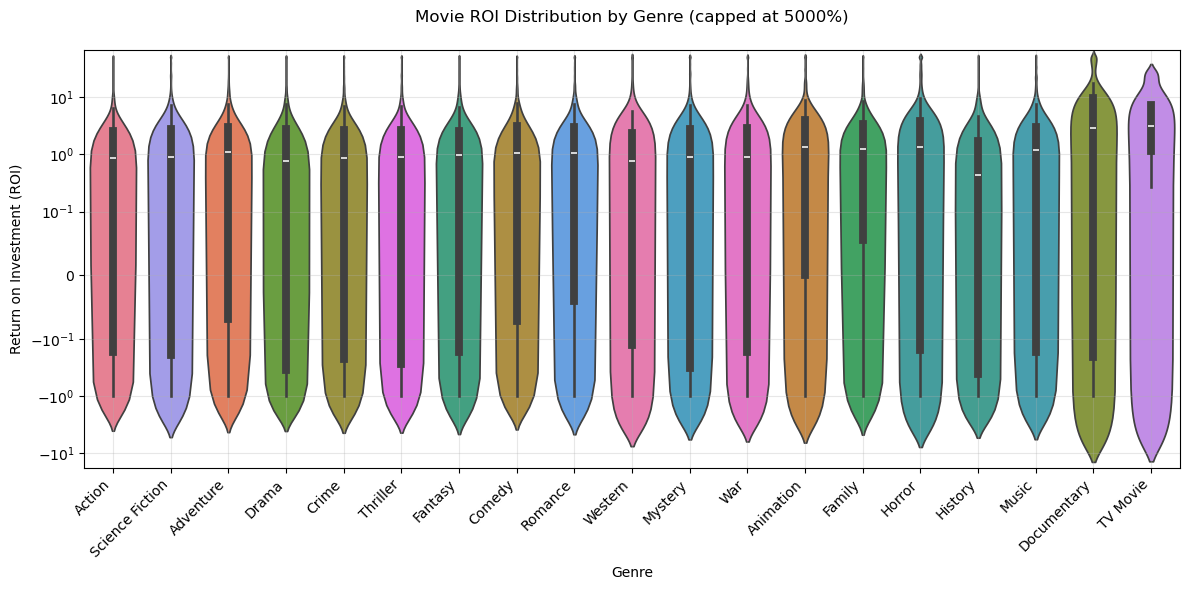

/Users/rizhong/Documents/GitHub/ada-2024-project-adaventurers2024/src/utils/genre_analysis.py:811: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/rizhong/Documents/GitHub/ada-2024-project-adaventurers2024/src/utils/genre_analysis.py:826: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/rizhong/Documents/GitHub/ada-2024-project-adaventurers2024/src/utils/genre_analysis.py:850: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this


Performance Rates by Genre:
                 Total Loss (>90%)  Severe Loss (>70%)  \
Action                         0.7                 2.1   
Adventure                      0.6                 2.2   
Animation                      0.2                 0.9   
Comedy                         0.5                 1.3   
Crime                          0.8                 2.0   
Documentary                    0.2                 0.4   
Drama                          0.7                 1.6   
Family                         0.3                 1.0   
Fantasy                        0.6                 1.6   
History                        0.4                 2.5   
Horror                         0.8                 1.8   
Music                          0.5                 1.2   
Mystery                        1.0                 2.3   
Romance                        0.6                 1.4   
Science Fiction                1.0                 2.4   
TV Movie                       0.0         

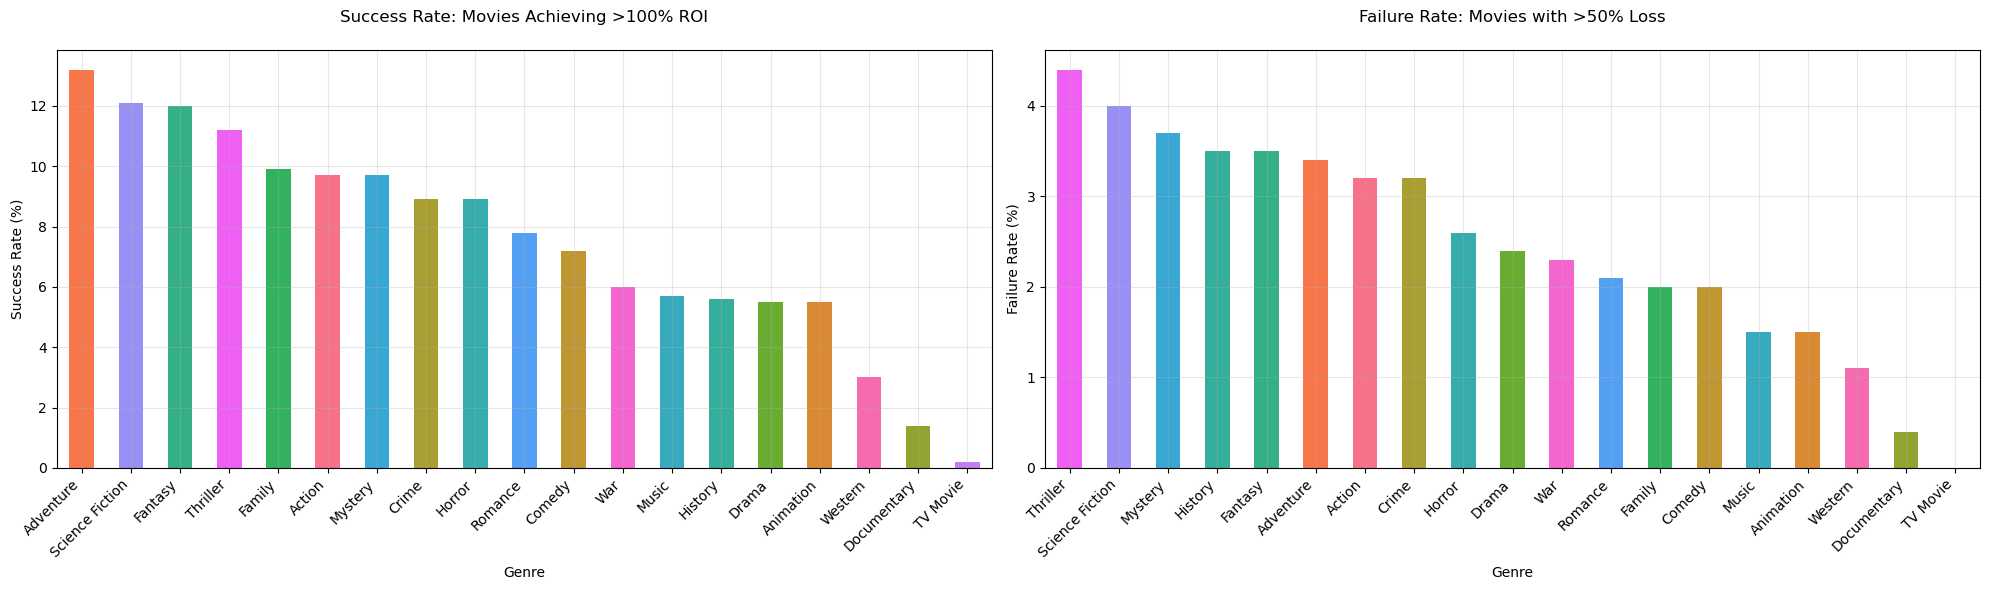

In [1]:
## code
from src.utils.genre_analysis import *

# df, df_genres = prepare_data("data/cmu_tmdb.csv")
# unique_genres = sorted(df_genres["genres"].unique())
# genre_colors = create_genre_colors(unique_genres)

# # Basic Analysis
# plot_genre_distributions(df_genres, genre_colors)

# # Performance Analysis
# plot_genre_performance(df_genres, genre_colors)

# # Temporal Analysis
# analyze_temporal_trends(df_genres, genre_colors, unique_genres)

# # ROI Analysis
# df, df_genres = analyze_roi(df, df_genres, genre_colors)

# # Budget Analysis
# budget_stats = analyze_budget_categories(df)

# # Success/Failure Rate Analysis
# performance_stats = analyze_success_failure_rates(
#     df_genres, genre_colors, unique_genres
# )

# # Summary Statistics
# summary_stats = get_summary_statistics(df_genres)

df = run_complete_interactive_analysis("data/cmu_tmdb.csv")['df']

#### 4.1 What we have done for the initial analysis

We employed several analytical approaches to understand genre impact on movie failure. 

- First, we used violin plots with symmetric log scaling to visualize profit distribution across genres, capturing both the central tendency and spread of financial performance. 
- To understand cultural reception, we analyzed the relationship between ratings and popularity (measured by vote count) using scatter plots with logarithmic scaling for vote counts. 
- We tracked genre performance over time using 5-year moving averages to identify long-term trends in audience reception. 
- Finally, we calculated and compared genre-specific success and failure rates to identify which genres carry the highest risk of significant financial loss.


#### 4.2 Key observations

##### Financial Performance by Genre

1. High-Profit Potential:

- Action/Adventure/Fantasy lead in extreme profits (mean profits: 13-25M USD)
- Documentary/TV Movies show lowest profits but highest ROI (9.03 and 7.13)
- Horror shows strong ROI (5.69) with moderate investment
- Drama (most common genre, 22,560 movies) shows modest profits (3.47M USD)

2. Budget Impact:

- Very low budget films: Highest ROI potential but highest volatility
- High budget films: More consistent but lower returns
- Clear inverse relationship between budget size and ROI potential

##### Audience Reception

1. Ratings:

- Animation leads with highest average rating (6.01)
- Family/War films follow with strong ratings
- Western shows lowest ratings
- Most genres maintain 5-7 rating range
- Documentary shows most consistent ratings

2. Popularity Patterns:

- Popular movies (high vote counts) cluster around 6-7 ratings
- Less popular movies show wider rating variation
- Profitable movies typically have high vote counts
- Genre impact on popularity is minimal

##### Historical Trends

- Ratings stabilized post-1960
- High volatility in early years (pre-1940)
- Modern convergence around 5-6 rating range
- Genre distinctions decreased over time

##### Risk Assessment

1. Success Rates:

- Adventure/Science Fiction/Fantasy: Highest success rates
- Documentary/TV Movies: Extreme success/failure patterns
- Horror: Good success rate with moderate risk

2. Failure Rates:

- Thriller/Science Fiction/Mystery: Highest failure rates
- Action/Adventure: More moderate failure rates despite high budgets
- Documentary: High risk but high potential return

##### Key Takeaway

Genre significantly impacts financial performance and risk levels. While Action/Adventure/Fantasy lead in absolute profits, smaller genres like Documentary and Horror show strong ROI potential. Ratings remain relatively consistent across genres, with Animation and Family films maintaining slight advantages. Budget size shows stronger correlation with returns than genre choice.


### 5. How does poor release timing (e.g., season, holiday periods) affect a movie's likelihood of failing?

In [ ]:
## code
from src.utils.timing_analysis import *

# Seasonal Analysis
seasonal_stats = plot_seasonal_distributions(df)

# Monthly Analysis
analyze_monthly_performance(df)

# Monthly ROI Analysis
monthly_perf_df = analyze_monthly_roi(df)

# Monthly Success Rate Analysis
plot_monthly_success_rates(monthly_perf_df)

# Monthly Statistics
monthly_stats = analyze_monthly_statistics(df, monthly_perf_df)

# Yearly Analysis
yearly_performance = analyze_temporal_trends(df)

#### 5.1 What we have done for the initial analysis

- To investigate how release timing affects movie failure, we analyzed the distribution of profits and ratings across different temporal categories using violin plots. 
- We compared failure rates across seasons and months to identify particularly risky release periods. 
- To account for industry evolution, we examined the temporal trends of success and failure rates alongside movie release volume using a dual-axis visualization combining line graphs for rates and bar charts for release counts. 

This allowed us to identify historical patterns in optimal release timing while controlling for changes in industry output volume.


#### 5.2 Key observations

##### Seasonal Patterns

1. Profitability and ROI:

   - Fall shows best overall performance (high ROI: 3.46, good profit distribution)
   - Spring has highest mean profit (7.23M USD) and median ROI (1.16)
   - Winter consistently underperforms (lowest profit: 2.56M USD, lowest ROI: 2.77)
   - Summer shows moderate, stable performance

2. Ratings and Volume:

   - Ratings remain relatively consistent across seasons (range: 4.72-5.19)
   - Winter/Fall have highest release volumes (~13,000 movies each)
   - Spring/Summer have fewer releases (~11,500 movies each)

##### Monthly Patterns

1. Strong Months:

   - June/July: Highest success rates (~8%), good ROI potential
   - December: Strong performance (high success rate, good profit potential)
   - Summer months generally show better profit concentration

2. Weak Months:

   - January: Lowest success rate (~2%), volatile ROI
   - August/September: Highest failure rates (~3%)
   - Early fall months show increased risk

##### Historical Trends

- Movie volume increased significantly since 1980s
- Success/failure rates remained relatively stable until recent years
- Post-2000 shows increased volatility
- Possible data anomaly showing success spike near 2020

##### Key Takeaway

Best release windows appear to be summer months (June/July) and December, while January and early fall carry higher risks. Fall and Spring show strongest overall financial metrics, but Winter consistently underperforms across all measures.


<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #E8F5E9; color: #333;">
    <strong>📖 Narrative & Thematic Elements</strong> 
</div>

A trope is a commonly recurring store-telling device in creative works. In film, tropes can be anything from narrative patterns (like the "last-minute rescue") to character archetypes (like the "mad scientist"), or even specific plot devices (like "time-traveling mishaps"). While tropes aren't inherently good or bad, their execution and context largely determine their effectiveness in storytelling.

This analysis examines tropes that appear disproportionately often in poorly-rated films. Our first step is identify the most common tropes in low-rated films, to then explore each genre individually, and finally compare the results across genres.

In [1]:
from src.utils.trope_analysis import *

### 6. What recurring plot patterns appear most frequently in critically panned films?

In [2]:
df_cmu_tropes = pd.read_csv("data/cmu_tropes.csv")

rq6(df_cmu_tropes)

Number of unique tropes: 23667
Number of unique movies: 2549
Shape of the filtered dataset: (203581, 11)
19 unique genres: {'War', 'Adventure', 'All', 'Music', 'History', 'Family', 'Romance', 'Science Fiction', 'Thriller', 'Action', 'Animation', 'Documentary', 'Crime', 'Fantasy', 'Comedy', 'Mystery', 'Horror', 'Drama', 'Western'}
Genre Adventure has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre All has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre Family has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre Romance has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre Science Fiction has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre Thriller has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre Action has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre Crime has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre Fantasy has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre Comedy has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre Mystery has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre Horror has 5 tropes with a ratio of low-rated movies to high-rated movies


Genre Drama has 5 tropes with a ratio of low-rated movies to high-rated movies


#### 6.1. What we have done for the initial analysis

To explore the relationship between narrative tropes and audience reception, we first established a rating threshold of 6.0 on a 10-point scale to distinguish between low and high-rated movies. Starting with low-rated films, we identified the 20 most common tropes and visualized their frequencies using a bar plot.

#### 6.2. Key observations

* The mean vote average for the dataset was 5.44, with a median of 5.6 after filtering out movies rated 6 or lower.
* The top 20 most common tropes in low-rated films were identified, with "ShotOut," "HorrorFilms," "FilmsOfThe1980s," "BigBad," and "LargeHam" being the top 5, each appearing in over 80 films.

Now, we will analyze the distribution of these tropes across different genres.

### 7. Which tropes consistently lead to negative reception by genre?

#### 7.1. What we have done for the initial analysis

We focused our initial analysis on three specific genres: Horror, Adventure, and Comedy. For each genre, we categorized films into low-rated (≤6.0) and high-rated (>6.0) groups and analyzed the tropes associated with each category. To highlight tropes that were disproportionately present in poorly received films, we calculated the ratio of trope occurrences in low-rated films to high-rated films. Finally, we visualized the top 10 tropes with the highest low-to-high rating ratios for each genre to identify patterns that might contribute to negative audience reception. The y-axis lists the tropes, while the x-axis shows the ratio of appearance in low-rated vs. high-rated films.

#### 7.2. Key observations

Key observations for horror films:

* "HotScientist" has the highest ratio (about 7x), suggesting this character trope rarely works well in horror films
* "TookTheBadFilmSeriously" and "BadSanta" (both around 5x) are the next highest ratios, indicating that earnest performances in poor films and evil Santa narratives tend to correlate with lower ratings

Key observations for adventure films:

* "NotScreenedForCritics" has the highest ratio (about 4x), suggesting films not shown to critics beforehand tend to be lower quality
* Action-related tropes like "ActionDressRip" and "DoesntLikeGuns" appear frequently in lower-rated films, suggesting certain action elements may be harder to execute well

Key observations for comedy films:

* "ContinuityReboot" tops the list (around 8x), indicating that comedy reboots of existing properties tend to be particularly challenging to execute well
* "AHandfulForAnEye" and "NotScreenedForCritics" (both around 6x) are also common in poorly-rated comedies
* Horror-related tropes like "SlasherFilm" and "SlasherMovie" appear in poorly-rated comedies, suggesting horror-comedy crossovers may be difficult to execute successfully

#### 7.3. Next steps

We will expand the previous analysis to include all the genres, comparing the results to identify differences and similarities in how tropes influence reception across genres. Additionally, we plan to investigate the occurrence of tropes combinations in movies that failed by examining different tuples of up to three tropes, such as ("Love Triangle", "Secret Identity", "Big Damn Kiss"), to determine if certain trope combinations are more prone to result in a movie's failure.

### 7. What plots are the most common in movies that fail?

In [3]:
rq7(df_cmu_tropes)

### 8. How have low-rated tropes evolved over time, and what trends can be observed in their average ratings across different periods?

In [4]:
rq8(df_cmu_tropes)

Initial shape: (256008, 11)
Number of rows after filtering: (1509, 11)
